In [89]:
%reload_ext autoreload
%autoreload 2

In [90]:
import sys
sys.path.insert(1,'./src/') 

import unittest
import numpy as np
import methods
import glob
import matplotlib.pyplot as plt
import scipy
import os
import betterspy
import pandas as pd

In [91]:
# setup.
X_paths = glob.glob("/Users/jackh/Documents/2023/Turbulence Research/Data/trajs2/*.csv")
# s = X_paths[1]
# print(X_paths)
# print(os.path.basename(s)[5:7])
def sortkey(s):
    return int(os.path.basename(s)[5:7])
X_paths.sort(key=sortkey)
print([X_paths[0]])

X_select = X_paths[:]
traj = methods.Trajectory(X=X_select,t=range(len(X_select)),sub_inds=None)
X0 = traj.Xat(0)

sl1 = methods.dynamic_laplacian_sl(X0)
n_s = traj.n_s
n_t = traj.n_t
print(n_s)
print(n_t)


['/Users/jackh/Documents/2023/Turbulence Research/Data/trajs2/traj_01.csv']
44991
60


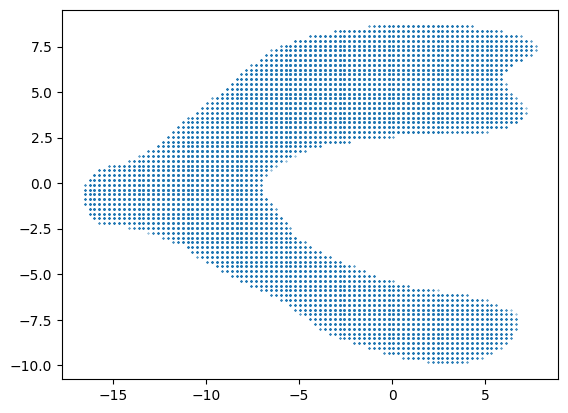

In [92]:
plt.scatter(X0[:,0],X0[:,1],s=0.1)

In [93]:
sl1

<44991x44991 sparse matrix of type '<class 'numpy.float64'>'
	with 300819 stored elements in COOrdinate format>

In [94]:
# P_final = scipy.sparse.coo_matrix((n_s,n_s))

In [95]:
eps = methods.nndist(X0,k=7)/np.sqrt(2)

In [96]:
P = methods.dynamic_laplacian(traj,eps=None,include_mult=1.5)

In [97]:
P

<44991x44991 sparse matrix of type '<class 'numpy.float64'>'
	with 881209 stored elements in Compressed Sparse Row format>

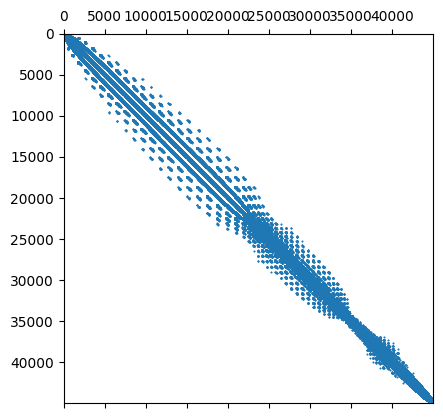

In [98]:
plt.spy(P,markersize=0.5)
# plt.imshow(P.todense())
# betterspy.show(P)

In [99]:
# betterspy.write_png(
#     "out.png",
#     P,
#     # border_width=2,
#     # border_color="red",
#     # colormap="viridis"
# )

In [100]:
vals, vecs= scipy.sparse.linalg.eigs(P,which='LM',k=10)

/Users/jackh/opt/anaconda3/envs/gordon_original/lib/python3.11/site-packages/matplotlib/axes/_axes.py:4411: ComplexWarning: Casting complex values to real discards the imaginary part
  c = np.asanyarray(c, dtype=float)


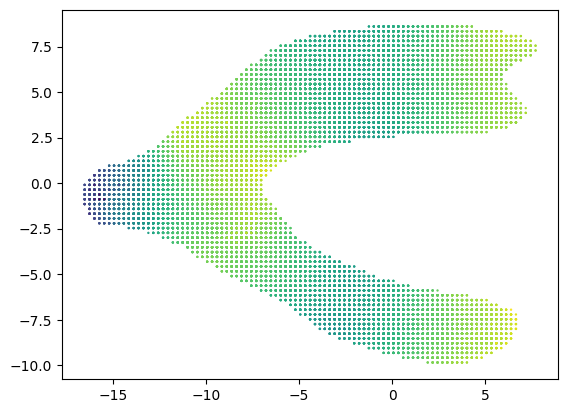

In [101]:
Xn = traj.Xat(0)
plt.scatter(Xn[:,0],Xn[:,1],c=vecs[:,5],s=0.5)

/Users/jackh/opt/anaconda3/envs/gordon_original/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


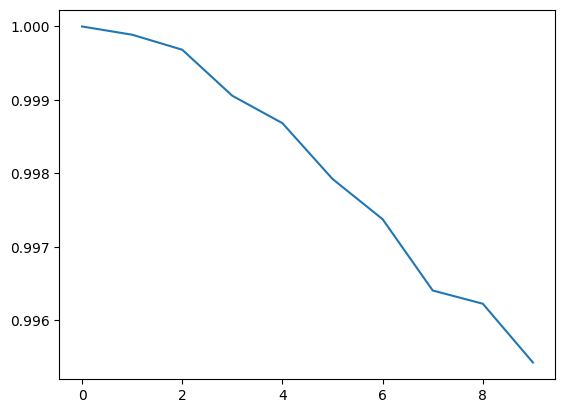

In [102]:
plt.plot(vals)

In [109]:
S, R = methods.SEBA(vecs[:,:10])

/Users/jackh/Documents/2023/Turbulence Research/Code/./src/methods.py:369: ComplexWarning: Casting complex values to real discards the imaginary part
  temp[i] = np.sign(z[i]) * np.max([np.abs(z[i]) - mu, 0])


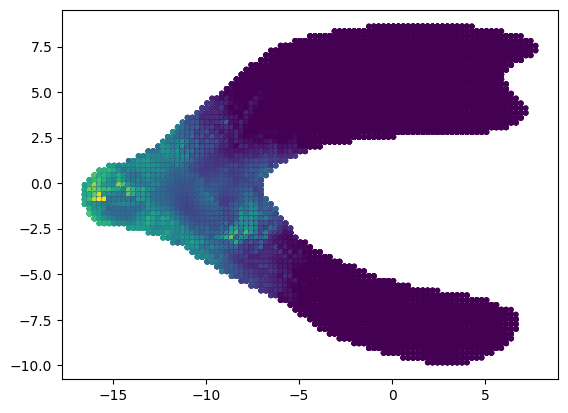

In [104]:
plt.scatter(Xn[:,0],Xn[:,1],c=S[:,0],s=10)

In [105]:
S

array([[ 0.4022645 , -0.        ,  0.        ],
       [ 0.36889925, -0.        ,  0.        ],
       [ 0.40220865, -0.        ,  0.        ],
       ...,
       [ 0.        ,  0.69705184, -0.        ],
       [ 0.        ,  0.68639903, -0.        ],
       [ 0.        ,  0.7089257 , -0.        ]])

In [106]:
# export...

import random

output_path = "./examples/piv_001_20231103/data_03/"

# sub_inds = random.sample(range(n_s),10)
sub_inds = range(n_s)

S_round = np.around(S,decimals=3)

for t_i in range(n_t):
    print(t_i)
    # df = pd.DataFrame(pd.np.column_stack([traj.Xat(t_i)[sub_inds,:],S[sub_inds,:]]))
    # df = pd.DataFrame(np.concatenate((traj.Xat(t_i)[sub_inds,:],S_round[sub_inds,:]),axis=1))
    df = pd.DataFrame(
        np.concatenate((traj.Xat(t_i)[sub_inds,:],S_round[sub_inds,:]),axis=1),
        columns=['x','y','z','s1','s2','s3']
        )
    df.to_csv(output_path+"seba_"+"{:02d}".format(t_i)+".csv",index=False)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


In [107]:
np.concatenate((np.eye(5),np.eye(5)),axis=1)

array([[1., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 1.]])

In [108]:
np.concatenate((traj.Xat(t_i)[sub_inds,:],S_round[sub_inds,:]),axis=1)

array([[-0.45884044,  8.67506401, -1.44041965,  0.402     , -0.        ,
         0.        ],
       [-0.46412552,  8.66642125, -1.19813795,  0.369     , -0.        ,
         0.        ],
       [-0.17074612,  8.62843162, -1.67249538,  0.402     , -0.        ,
         0.        ],
       ...,
       [ 2.50001065, -9.73665687, -1.43177314,  0.        ,  0.697     ,
        -0.        ],
       [ 2.67872413, -9.71349828, -1.95769768,  0.        ,  0.686     ,
        -0.        ],
       [ 2.63408922, -9.73325793, -1.66307095,  0.        ,  0.709     ,
        -0.        ]])